# Using NLTK’s Pre-Trained Sentiment Analyzer

Natural Language Toolkit (NLTK) is a leading platform for building Python programs to work with human language data. It already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).

Since VADER is pretrained, we can get primitive results more quickly than with many other analyzers. However, VADER is best suited for language used in social media, like short sentences with some slang and abbreviations. It’s less accurate when rating longer, structured sentences, but it’s often a good launching point. Let's see how VADER perforems in our case.

## Loading Libraries and Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from random import shuffle

nltk.download(["stopwords", "vader_lexicon", "punkt"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
url = 'https://raw.githubusercontent.com/yanyuchen/sentiment-analysis/main/data/all_reviews.csv'
df = pd.read_csv(url).drop(['attraction', 'datecolumn', 'coordinates'], axis = 1).dropna()
df.head()

,review,rating
0,My family took the tour ( BUY TICKETS IN ADVAN...,5.0
1,This is a must stop if you are in San Fran!!! ...,5.0
2,I did not expect to enjoy the tour as much as ...,5.0
3,San Francisco is completely unsafe. We bought ...,1.0
4,I had a 13-hour layover in San Francisco And I...,4.0


## Create an Instance of the Pre-trained VADER

Since the VADER has already been trained, we can test the performance on the whole data. A naive model is then classify positive/nagative based on the compound score of the VADER.

In [ ]:
sia = SentimentIntensityAnalyzer()
def is_positive(txt: str) -> bool:
    return sia.polarity_scores(txt)["compound"] > 0

In [ ]:
pred = [is_positive(txt) for txt in df.review]

In [ ]:
def accuracy(pred, act):
  return sum(pred == act)/len(act)

In [ ]:
act = df.rating > 3

accuracy(act, pred)

0.7284775347484107

It turns out that this naive approach has certain ability to distinguish positive/negative reviews but does not perform well. Thus, we explore ourselves to scikit-learn classifiers with the goal of find a desirable model.

## Deeper Insight from the VADER
Before we move to scikit-learn classifiers, we may take a closer look at what kind of words in a review that makes the VADER classify the review positve or negative.

In [ ]:
positive_review = [review for review in df.review if is_positive(review)]
negative_review = [review for review in df.review if is_positive(review) == False]
positive_words = [word.lower() for review in positive_review for word in review.split()]
negative_words = [word.lower() for review in negative_review for word in review.split()]



Since many words are present in both positive and negative sets, we remove the common words in the positve and negative reviews from the distribution objects.

In [ ]:
positive_fd = nltk.FreqDist(positive_words)
negative_fd = nltk.FreqDist(negative_words)

common_set = set(positive_fd).intersection(negative_fd)

for word in common_set:
    del positive_fd[word]
    del negative_fd[word]

### Positive Words from the VADER

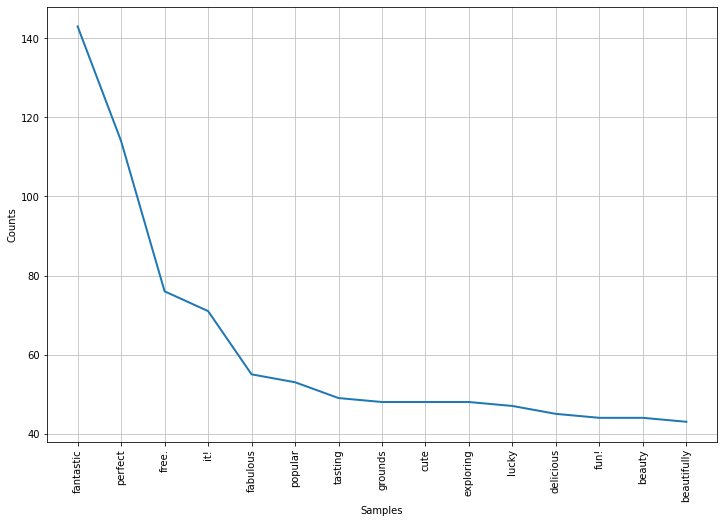

In [ ]:
plt.figure(figsize=(12,8))
positive_fd.plot(15)
plt.show()

In [ ]:
positive_fd

FreqDist({'fantastic': 143, 'perfect': 114, 'free.': 76, 'it!': 71, 'fabulous': 55, 'popular': 53, 'tasting': 49, 'grounds': 48, 'cute': 48, 'exploring': 48, ...})

From the first of few words, we see many commendatory terms. It makes sense that the VADER classifies a review into positive according to them.

### Negative Words from the VADER

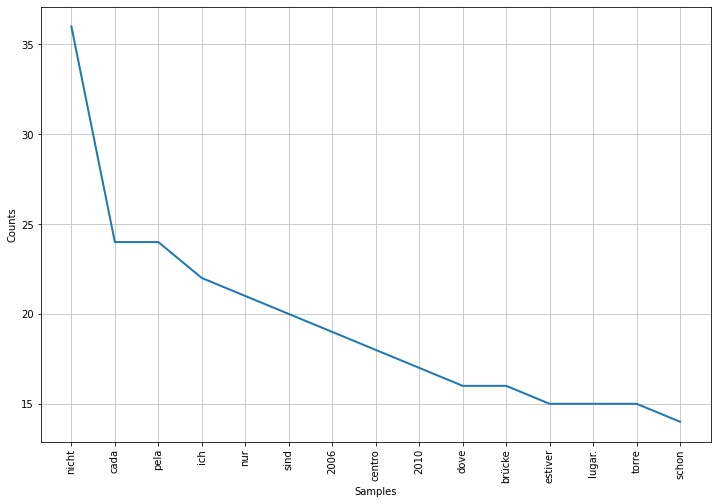

In [ ]:
plt.figure(figsize=(12,8))
negative_fd.plot(15)
plt.show()

In [ ]:
negative_fd

FreqDist({'nicht': 36, 'cada': 24, 'pela': 24, 'ich': 22, 'nur': 21, 'sind': 20, '2006': 19, 'centro': 18, '2010': 17, 'dove': 16, ...})

Some words are truely derogatory terms, but not all of them. There is no clear pattern as positive reviews. It is hard to tell why the VADER classies a review into negative according to them. However, we should point out that in our dataset the negative reviews are much less than the positive. The imbalance of positive/negative reviews may result in extra difficulty of classifiying.